# **DATA SCIENCE AND BUSINESS ANALYTICS**
**THE SPARKS FOUNDATION**


# **TASK 2 : Prediction using Unsupervised ML** 
**From the given "Iris" dataset, predict the optimum number of clusters and represent them visually.**<br>
**Dataset : https://bit.ly/3kXTdox**


# **#GRIPOCTOBER21**

**AUTHOR : SHRIKRUSHNAKUMAR BHAUSAHEB SONDGE**

**Let's import all the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
plt.style.use('seaborn-darkgrid')

**Importing the dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
df = pd.read_csv('Iris.csv')

**Having look at basic information of dataset**

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Checking for duplicate values.
print(df.duplicated().sum())
print(f"\n{'0'} indicates that there is no duplicate value in dataset.")

0

0 indicates that there is no duplicate value in dataset.


In [9]:
#Checking for Null Values.
print(df.isnull().sum())
print(f"\n{'0'} indicates that there is not any null value in dataset.")

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

0 indicates that there is not any null value in dataset.


**Having look at Statastical Insights**

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


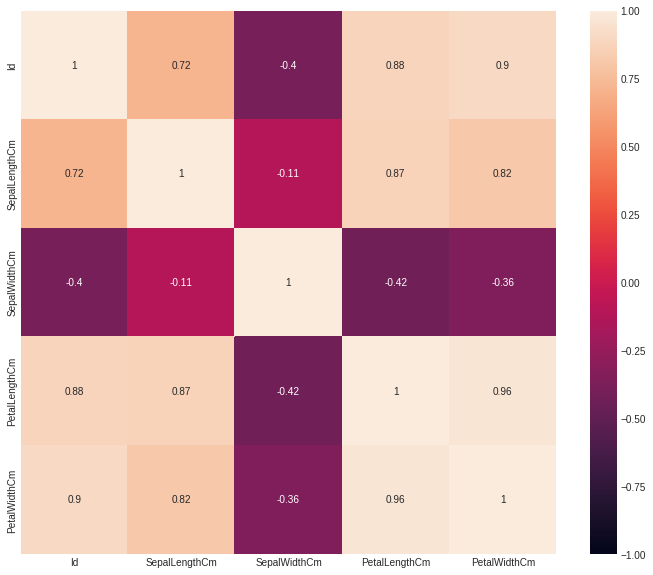

In [12]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

**Data Exploration And Visualization**

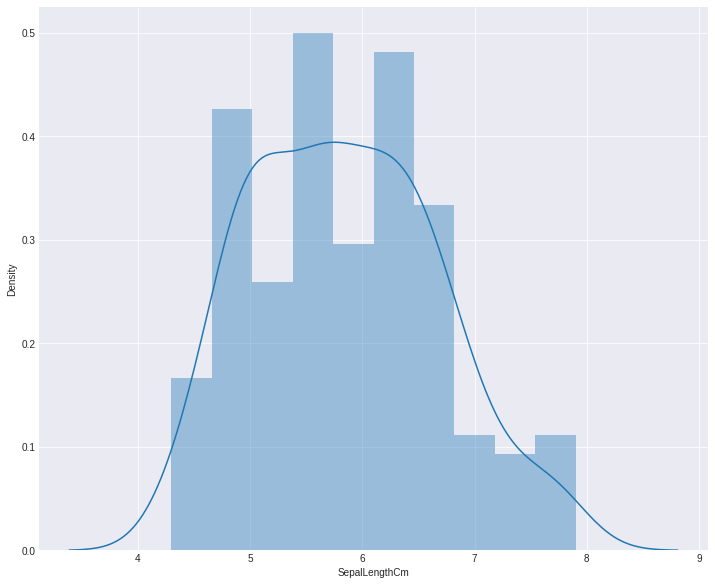

In [13]:
plt.figure(figsize = (12,10))
sns.distplot(df["SepalLengthCm"], bins = 10)

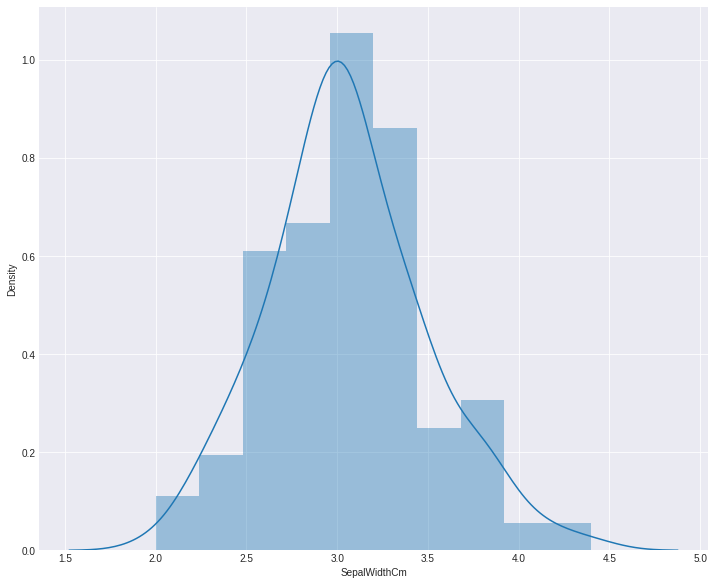

In [14]:
plt.figure(figsize = (12,10))
sns.distplot(df["SepalWidthCm"], bins = 10)

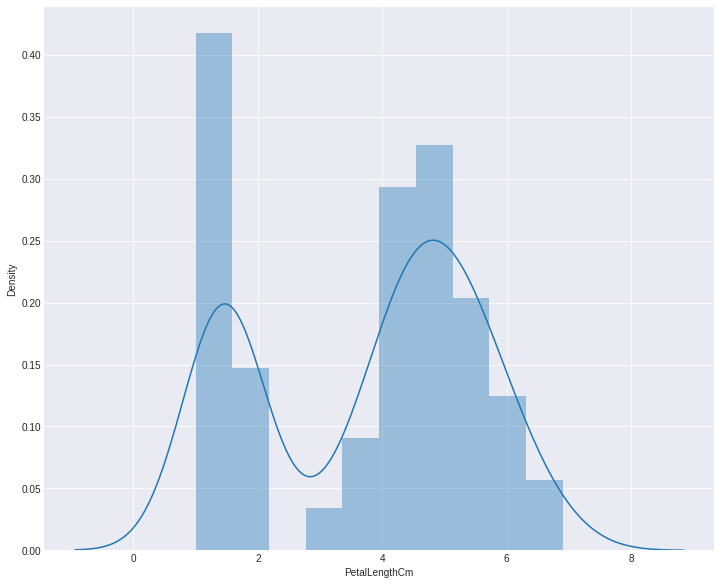

In [15]:
plt.figure(figsize = (12,10))
sns.distplot(df["PetalLengthCm"], bins = 10)

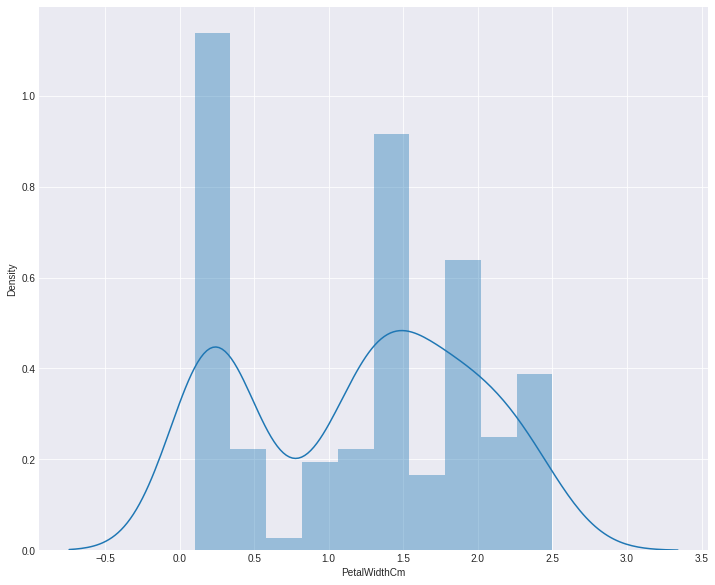

In [16]:
plt.figure(figsize = (12,10))
sns.distplot(df["PetalWidthCm"], bins = 10)

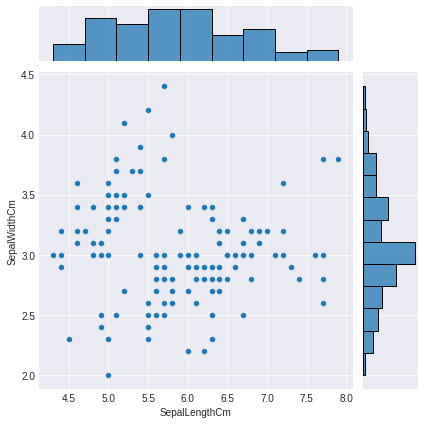

In [17]:
sns.jointplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df)

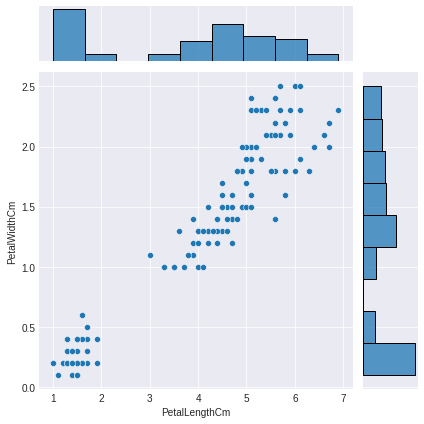

In [18]:
sns.jointplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df)

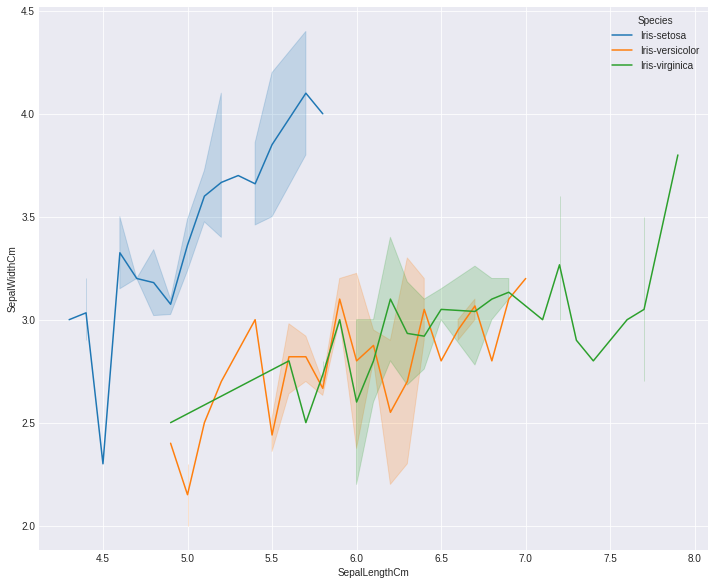

In [19]:
plt.figure(figsize = (12,10))
sns.lineplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df , hue = "Species")

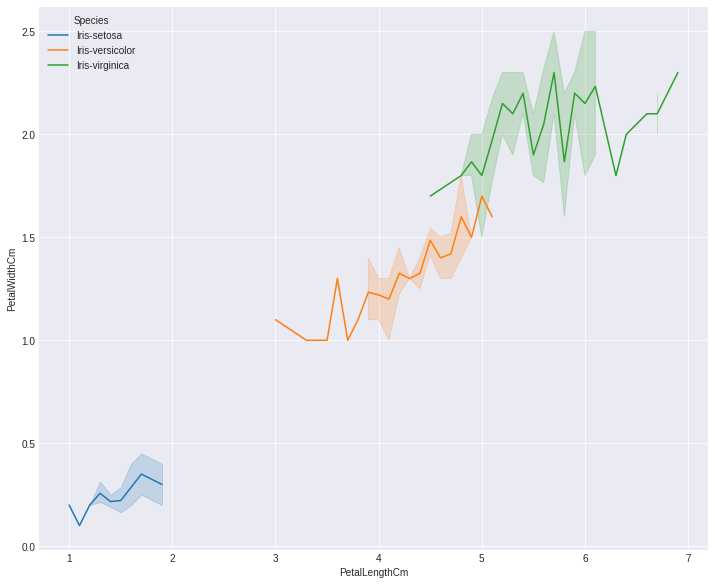

In [20]:
plt.figure(figsize = (12,10))
sns.lineplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df , hue = "Species")

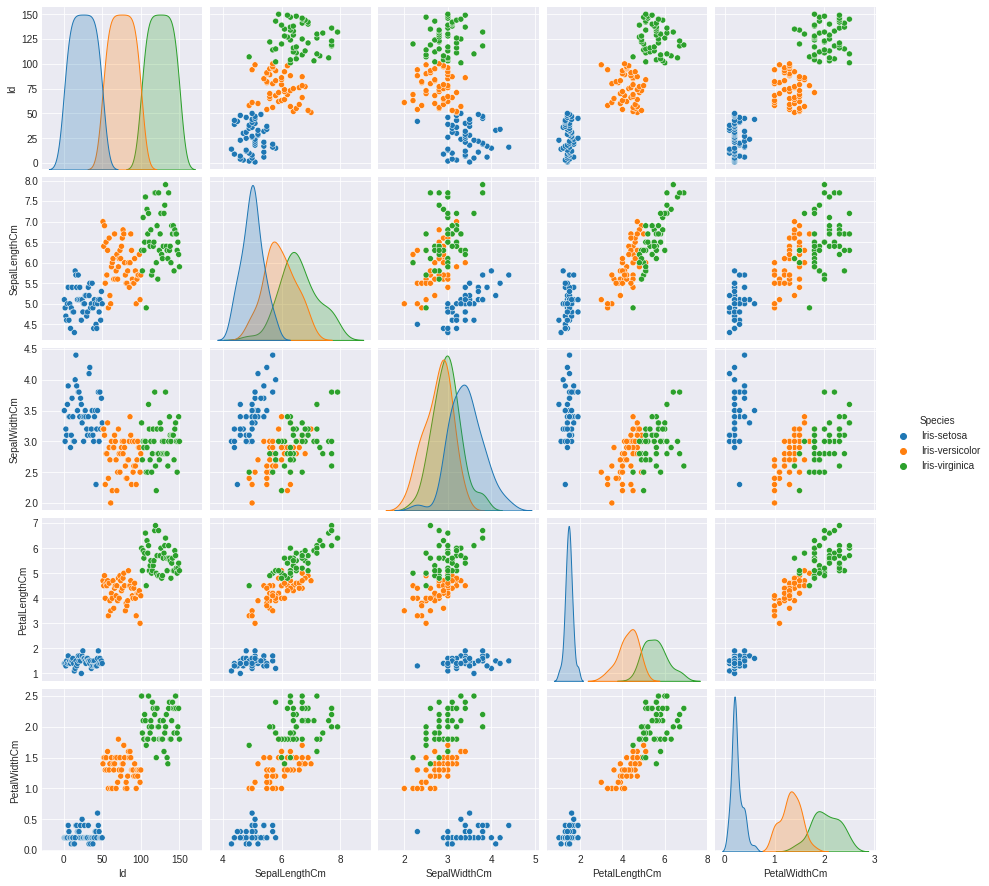

In [21]:
sns.pairplot(df, hue = "Species")

# **Preparing Data**
**K-MEANS**

In [22]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


**Elbow Plot**

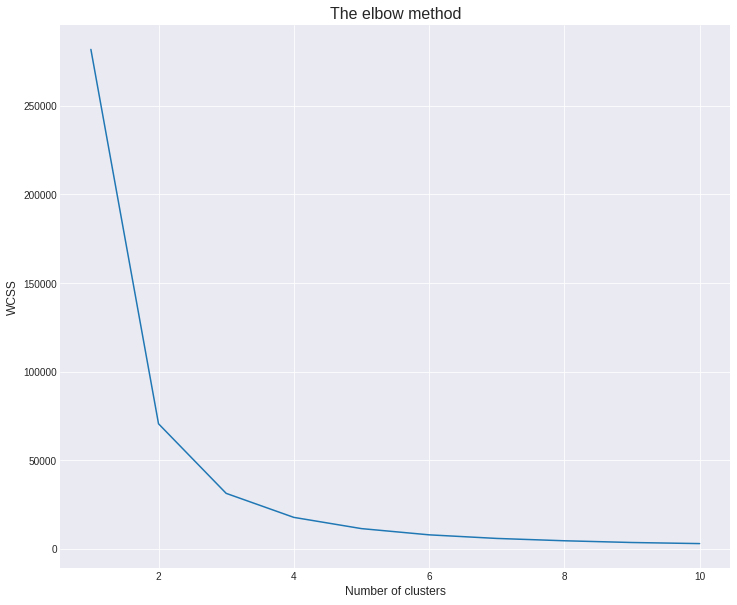

In [23]:
plt.figure(figsize = (12,10))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method' , size = 16)
plt.xlabel('Number of clusters' , size = 12)
plt.ylabel('WCSS' , size = 12)
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


**K-MEANS**

In [25]:
kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)

[7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


**Let us Visualize the Cluster**

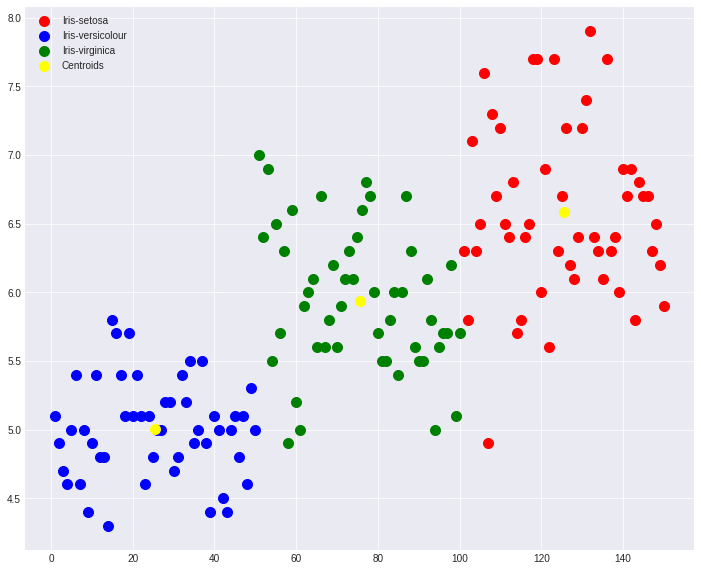

In [26]:
plt.figure(figsize = (12,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

**Here we conclude that , The data has 3 cluster points**